In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sco
from scipy.stats import linregress
import seaborn as sns
sns.set()

Number of ensumble : 50

Number of ensumble in critical region: 2000

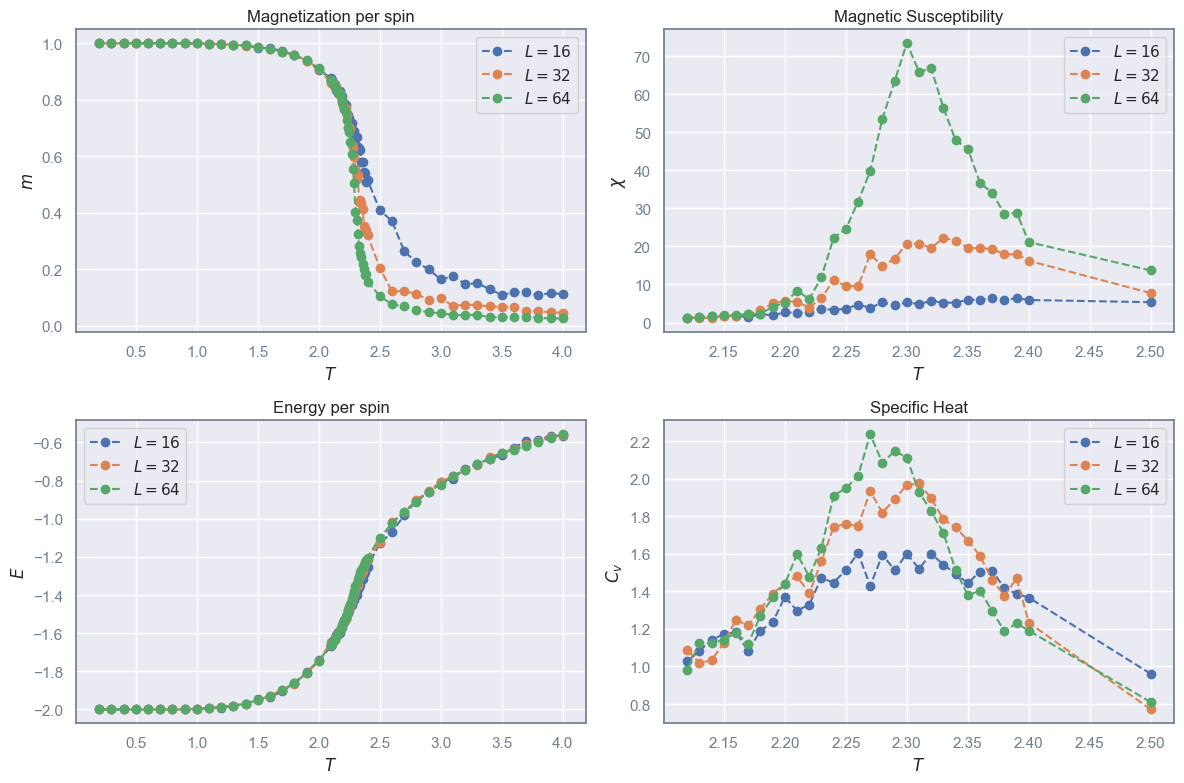

In [2]:
sizes = [16, 32, 64]
zoom = np.power(sizes,2.0)
labels = [ r"$L = {0}$".format(k) for k in sizes]
dataset = [ np.loadtxt(f"Ising_{k}.csv", delimiter=',', skiprows=1) for k in sizes]
plt.figure(figsize=(12,8))

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.tick_params(color='#708090', labelcolor='#708090')
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('#708090')


plt.subplot(221)

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[:,0], data[:,1], ls="--", marker="o", label = labels[k], color = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$T$")
plt.ylabel(r"$m$")
plt.title("Magnetization per spin")

plt.subplot(222)

a = 15
b = 45
        

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[a:b,0], data[a:b,4]*zoom[k], ls="--", marker="o", label = labels[k], color = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$T$")
plt.ylabel(r"$\chi$")
plt.title("Magnetic Susceptibility")

plt.subplot(223)

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[:,0], data[:,2], ls="--", marker="o", label = labels[k], color = c)
    k += 1
plt.legend(loc="upper left")
plt.xlabel(r"$T$")
plt.ylabel(r"$E$")
plt.title("Energy per spin")


plt.subplot(224)

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[a:b,0], data[a:b,3]*zoom[k], ls="--", marker="o", label = labels[k], color = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$T$")
plt.ylabel(r"$C_v$")
plt.title("Specific Heat")
plt.tight_layout()
plt.show()

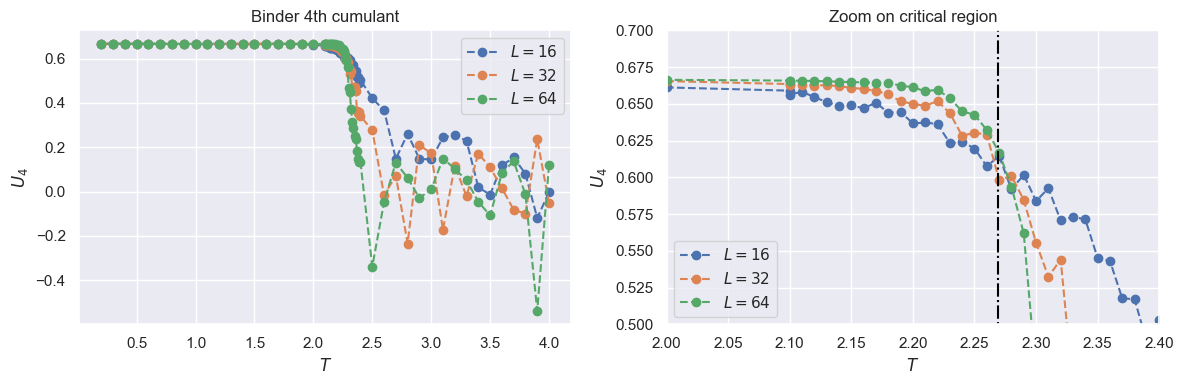

In [3]:
plt.figure(figsize=(12,4))

plt.subplot(121)
palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[:,0], data[:,5], ls="--", marker="o", label = labels[k], color = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$T$")
plt.ylabel(r"$U_4$")
plt.title("Binder 4th cumulant")


plt.subplot(122)
palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[:,0], data[:,5], ls="--", marker="o", label = labels[k], color = c)
    k += 1
plt.plot((2.269185314, 2.269185314), (0.4,0.8), ls="-.", color="black")
plt.xlim((2.0,2.4))
plt.ylim((0.5,0.7))
plt.legend(loc="lower left")
plt.xlabel(r"$T$")
plt.ylabel(r"$U_4$")
plt.title("Zoom on critical region")

plt.tight_layout()
plt.show()

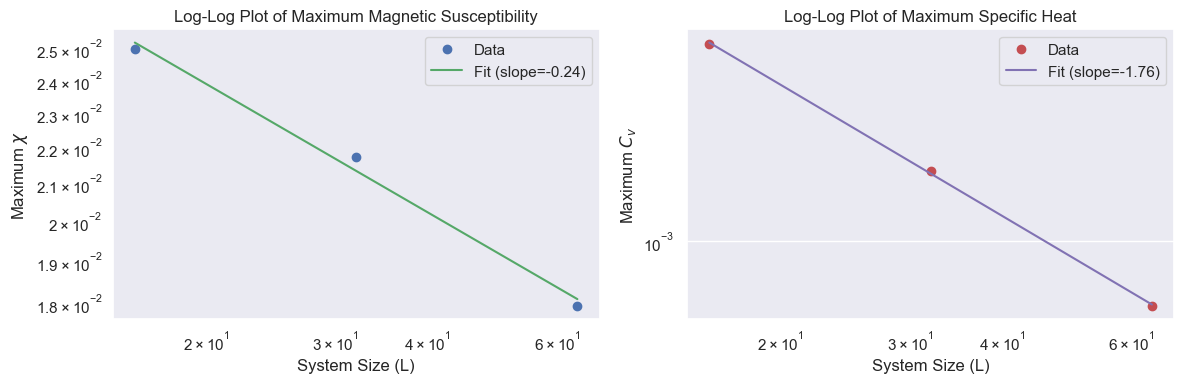

Slope of Magnetic Susceptibility: -0.23840082474745256
Slope of Specific Heat: -1.7599464331945722


In [4]:
sizes = [16, 32, 64]
zoom = np.power(sizes,2.0)
labels = [ r"$L = {0}$".format(k) for k in sizes]
dataset = [ np.loadtxt(f"Ising_{k}.csv", delimiter=',', skiprows=1) for k in sizes]

max_chi_values = []
max_cv_values = []


for data in dataset:
    max_chi_value = np.max(data[:, 4])
    max_chi_values.append(max_chi_value)
    
    max_cv_value = np.max(data[:, 3])
    max_cv_values.append(max_cv_value)

# Fit a line to the log-log plots
slope_chi, intercept_chi, _, _, _ = linregress(np.log(sizes), np.log(max_chi_values))
slope_cv, intercept_cv, _, _, _ = linregress(np.log(sizes), np.log(max_cv_values))

# Plot the log-log plots with the fitted lines
plt.figure(figsize=(12, 4))

# Plot magnetic susceptibility
plt.subplot(121)
plt.loglog(sizes, max_chi_values, marker='o', linestyle='', color='b', label='Data')
plt.plot(sizes, np.exp(intercept_chi) * np.power(sizes, slope_chi), linestyle='-', color='g', label=f'Fit (slope={slope_chi:.2f})')
plt.xlabel('System Size (L)')
plt.ylabel('Maximum $\chi$')
plt.title('Log-Log Plot of Maximum Magnetic Susceptibility')
plt.legend()

# Plot specific heat
plt.subplot(122)
plt.loglog(sizes, max_cv_values, marker='o', linestyle='', color='r', label='Data')
plt.plot(sizes, np.exp(intercept_cv) * np.power(sizes, slope_cv), linestyle='-', color='m', label=f'Fit (slope={slope_cv:.2f})')
plt.xlabel('System Size (L)')
plt.ylabel('Maximum $C_v$')
plt.title('Log-Log Plot of Maximum Specific Heat')
plt.legend()

plt.tight_layout()
plt.show()

print("Slope of Magnetic Susceptibility:", slope_chi)
print("Slope of Specific Heat:", slope_cv)

1.3644457162095434 0.19120471500034023
0.28421382060640704 0.05010207658178426


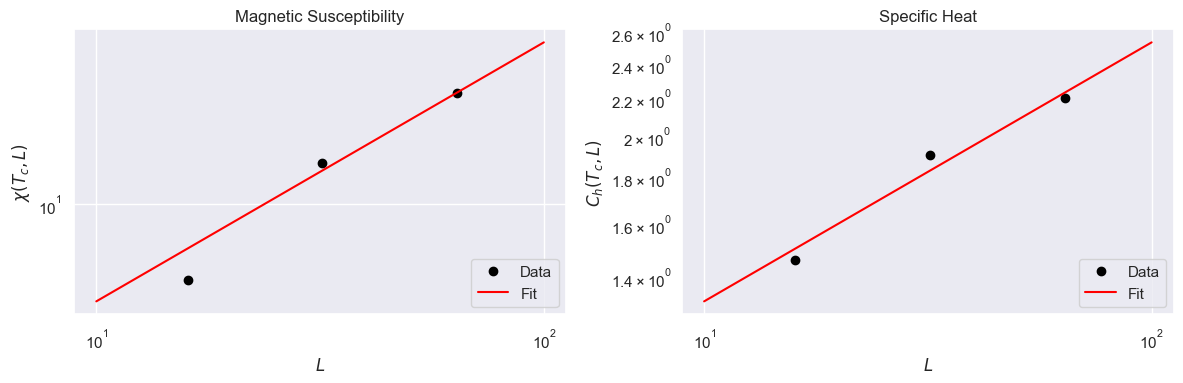

In [5]:
sizes = [16, 32, 64]
zoom = np.power(sizes,2.0)
labels = [ r"$L = {0}$".format(k) for k in sizes]
dataset = [ np.loadtxt(f"Ising_{k}.csv", delimiter=',', skiprows=1) for k in sizes]

t = np.linspace(10,100,100)

#To store some linear interpolations between data
m = np.empty(len(sizes))
n = np.empty(len(sizes))
cortes = np.empty((len(sizes),2))

#2.26, 2.27
a = 30
b = 29

tc = 2.2682932444826074 #Critical T

    
#Chi
x = 0
y = 4
    
#Create interpolation lines
k = 0
for data in dataset:
    data[:,y] = data[:,y] * zoom[k] #Make the appropiate scale - not per spin
    m[k] = (data[b,y] - data[a,y]) / (data[b, x] - data[a, x])
    n[k] = data[a, y] - m[k] * data[a, x]   
    cortes[k,0] = m[k] * tc + n[k]
    k += 1
    
#Specific heat
x = 0
y = 3
    
#Create interpolation lines
k = 0
for data in dataset:
    data[:,y] = data[:,y] * zoom[k]
    m[k] = (data[b,y] - data[a,y]) / (data[b, x] - data[a, x])
    n[k] = data[a, y] - m[k] * data[a, x]   
    cortes[k,1] = m[k] * tc + n[k]
    k += 1

titles = ["Magnetic Susceptibility", "Specific Heat"]
ylabels =[r"$\chi(T_c, L)$", r"$C_h (T_c, L)$"]

plt.figure(figsize=(12,4))
for k in range(2):
    plt.subplot(1,2,k+1) 


    popt, pcov = sco.curve_fit(lambda x,r,s : s*np.power(x, r), sizes, np.abs(cortes[:,k]))
    perr = np.sqrt(np.diag(pcov)) #And compute its errors
    print(popt[0], perr[0]) #Show the values
    #Plot the data and also the fit
    plt.plot(sizes, np.abs(cortes[:,k]), ls="none", marker = "o", label="Data", color="black")
    plt.plot(t, np.power(t, popt[0])*popt[1],  label="Fit", color="red")


    plt.legend(loc="lower right")
    plt.title(titles[k])
    plt.xlabel(r"$L$")
    plt.ylabel(ylabels[k])
    plt.yscale('log')
    plt.xscale('log')

plt.tight_layout()
plt.show()

$\gamma = 1.364 \pm 0.191 $

$\alpha = 0.284 \pm 0.050$

Number of ensumble : 25

Number of ensumble in critical region : 50

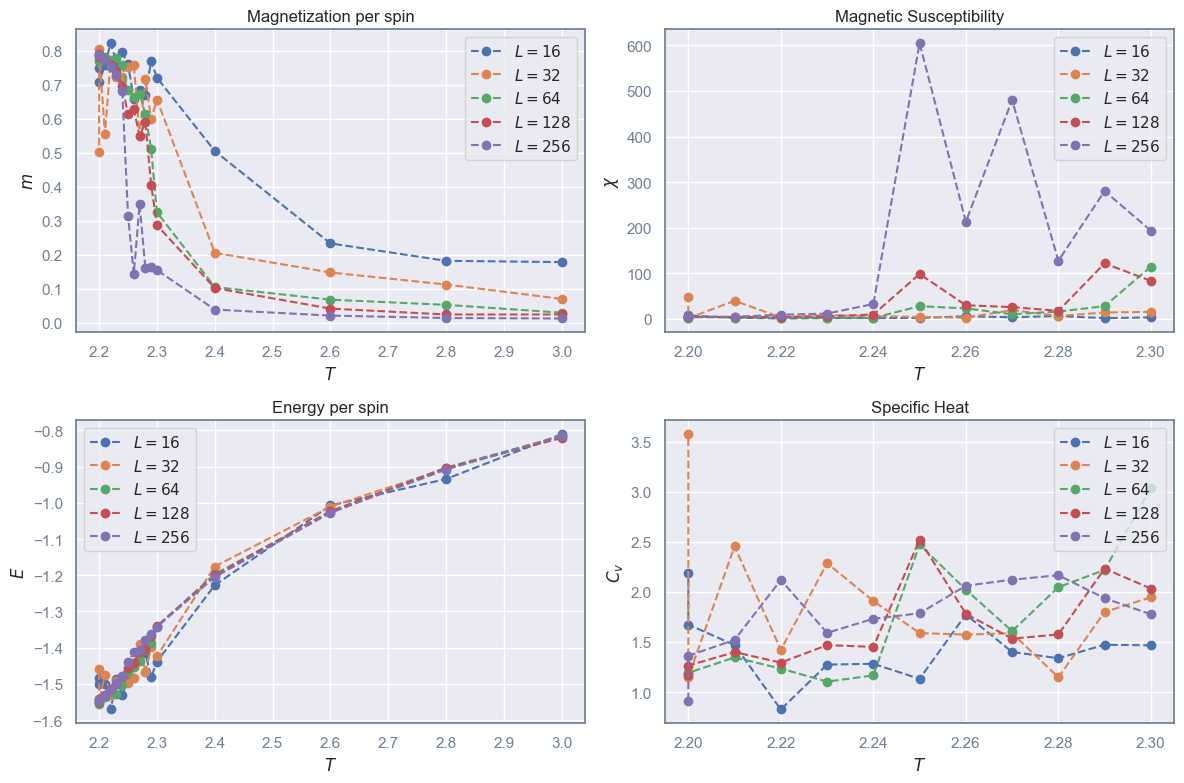

In [6]:
sizes = [16, 32, 64, 128, 256]
zoom = np.power(sizes,2.0)
labels = [ r"$L = {0}$".format(k) for k in sizes]
dataset = [ np.loadtxt(f"IsingII_{k}.csv", delimiter=',', skiprows=1) for k in sizes]

plt.figure(figsize=(12,8))

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.tick_params(color='#708090', labelcolor='#708090')
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('#708090')


plt.subplot(221)

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[:,0], data[:,1], ls="--", marker="o", label = labels[k], color = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$T$")
plt.ylabel(r"$m$")
plt.title("Magnetization per spin")

plt.subplot(222)

a = 4
b = 16
        

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[a:b,0], data[a:b,4]*zoom[k], ls="--", marker="o", label = labels[k], color = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$T$")
plt.ylabel(r"$\chi$")
plt.title("Magnetic Susceptibility")

plt.subplot(223)

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[:,0], data[:,2], ls="--", marker="o", label = labels[k], color = c)
    k += 1
plt.legend(loc="upper left")
plt.xlabel(r"$T$")
plt.ylabel(r"$E$")
plt.title("Energy per spin")


plt.subplot(224)

palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[a:b,0], data[a:b,3]*zoom[k], ls="--", marker="o", label = labels[k], color = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$T$")
plt.ylabel(r"$C_v$")
plt.title("Specific Heat")
plt.tight_layout()
plt.show()


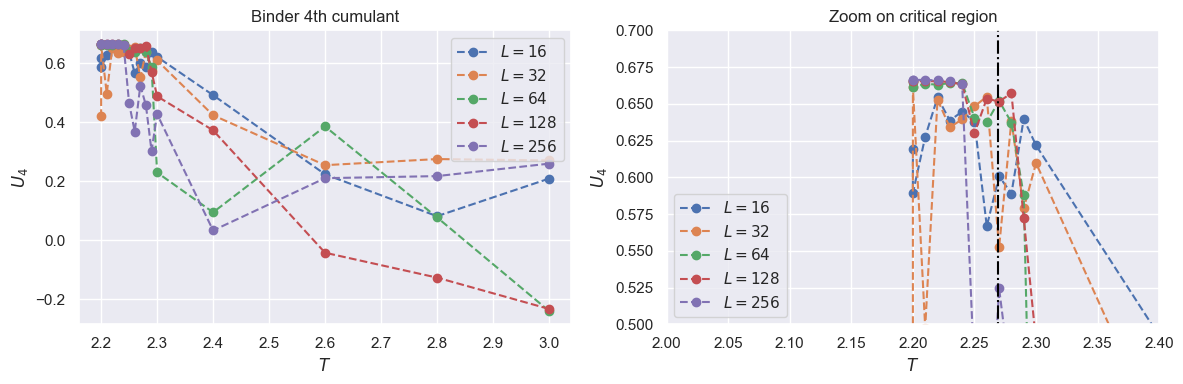

In [7]:
plt.figure(figsize=(12,4))

plt.subplot(121)
palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[:,0], data[:,5], ls="--", marker="o", label = labels[k], color = c)
    k += 1
plt.legend(loc="upper right")
plt.xlabel(r"$T$")
plt.ylabel(r"$U_4$")
plt.title("Binder 4th cumulant")


plt.subplot(122)
palette = sns.color_palette() #To get colors
k = 0
for data in dataset:
    c = palette.pop(0)
    plt.plot(data[:,0], data[:,5], ls="--", marker="o", label = labels[k], color = c)
    k += 1
plt.plot((2.269185314, 2.269185314), (0.4,0.8), ls="-.", color="black")
plt.xlim((2.0,2.4))
plt.ylim((0.5,0.7))
plt.legend(loc="lower left")
plt.xlabel(r"$T$")
plt.ylabel(r"$U_4$")
plt.title("Zoom on critical region")

plt.tight_layout()
plt.show()

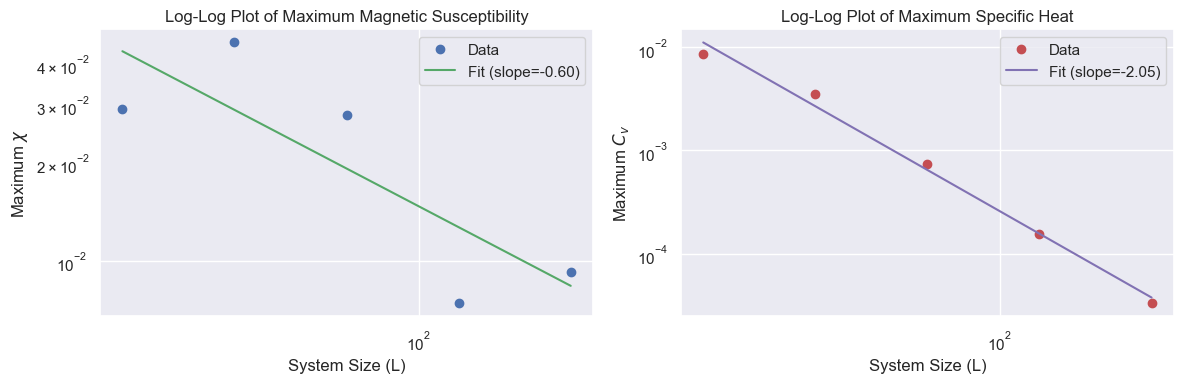

Slope of Magnetic Susceptibility: -0.5960235704518062
Slope of Specific Heat: -2.0532687447141447


In [8]:
sizes = [16, 32, 64, 128, 256]
zoom = np.power(sizes,2.0)
labels = [ r"$L = {0}$".format(k) for k in sizes]
dataset = [ np.loadtxt(f"IsingII_{k}.csv", delimiter=',', skiprows=1) for k in sizes]

max_chi_values = []
max_cv_values = []


for data in dataset:
    max_chi_value = np.max(data[:, 4])
    max_chi_values.append(max_chi_value)
    
    max_cv_value = np.max(data[:, 3])
    max_cv_values.append(max_cv_value)

# Fit a line to the log-log plots
slope_chi, intercept_chi, _, _, _ = linregress(np.log(sizes), np.log(max_chi_values))
slope_cv, intercept_cv, _, _, _ = linregress(np.log(sizes), np.log(max_cv_values))

# Plot the log-log plots with the fitted lines
plt.figure(figsize=(12, 4))

# Plot magnetic susceptibility
plt.subplot(121)
plt.loglog(sizes, max_chi_values, marker='o', linestyle='', color='b', label='Data')
plt.plot(sizes, np.exp(intercept_chi) * np.power(sizes, slope_chi), linestyle='-', color='g', label=f'Fit (slope={slope_chi:.2f})')
plt.xlabel('System Size (L)')
plt.ylabel('Maximum $\chi$')
plt.title('Log-Log Plot of Maximum Magnetic Susceptibility')
plt.legend()

# Plot specific heat
plt.subplot(122)
plt.loglog(sizes, max_cv_values, marker='o', linestyle='', color='r', label='Data')
plt.plot(sizes, np.exp(intercept_cv) * np.power(sizes, slope_cv), linestyle='-', color='m', label=f'Fit (slope={slope_cv:.2f})')
plt.xlabel('System Size (L)')
plt.ylabel('Maximum $C_v$')
plt.title('Log-Log Plot of Maximum Specific Heat')
plt.legend()

plt.tight_layout()
plt.show()

print("Slope of Magnetic Susceptibility:", slope_chi)
print("Slope of Specific Heat:", slope_cv)

1.431544640807967 0.41327866059723156
0.10487108270359147 0.042285997990917853


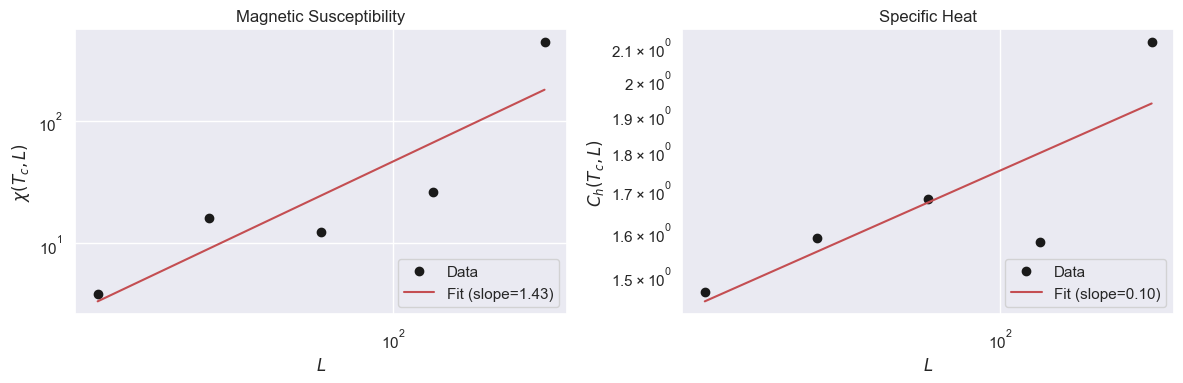

In [17]:
sizes = [16, 32, 64, 128, 256]
zoom = np.power(sizes,2.0)
labels = [ r"$L = {0}$".format(k) for k in sizes]
dataset = [ np.loadtxt(f"IsingII_{k}.csv", delimiter=',', skiprows=1) for k in sizes]

t = np.linspace(10,300,100)

#To store some linear interpolations between data
m = np.empty(len(sizes))
n = np.empty(len(sizes))
cortes = np.empty((len(sizes),2))

#2.26, 2.27
a = 7
b = 8

tc = 2.2682932444826074 #Critical T

    
#Chi
x = 0
y = 4
    
#Create interpolation lines
k = 0
for data in dataset:
    data[:,y] = data[:,y] * zoom[k] #Make the appropiate scale - not per spin
    m[k] = (data[b,y] - data[a,y]) / (data[b, x] - data[a, x])
    n[k] = data[a, y] - m[k] * data[a, x]   
    cortes[k,0] = m[k] * tc + n[k]
    k += 1
    
#Specific heat
x = 0
y = 3
    
#Create interpolation lines
k = 0
for data in dataset:
    data[:,y] = data[:,y] * zoom[k]
    m[k] = (data[b,y] - data[a,y]) / (data[b, x] - data[a, x])
    n[k] = data[a, y] - m[k] * data[a, x]   
    cortes[k,1] = m[k] * tc + n[k]
    k += 1

titles = ["Magnetic Susceptibility", "Specific Heat"]
ylabels =[r"$\chi(T_c, L)$", r"$C_h (T_c, L)$"]

plt.figure(figsize=(12,4))
for k in range(2):
    plt.subplot(1,2,k+1) 


    slope, intercept, _, _, se = linregress(np.log(sizes), np.log(np.abs(cortes[:,k])))
    plt.loglog(sizes, np.abs(cortes[:,k]), marker='o', linestyle='', color='k', label='Data')
    plt.plot(sizes, np.exp(intercept) * np.power(sizes, slope), linestyle='-', color='r', label=f'Fit (slope={slope:.2f})')
    print(slope, se)
    plt.legend(loc="lower right")
    plt.title(titles[k])
    plt.xlabel(r"$L$")
    plt.ylabel(ylabels[k])
    plt.yscale('log')
    plt.xscale('log')

plt.tight_layout()
plt.show()

$\gamma = 1.434 \pm 0.413 $

$\alpha = 0.1 \pm 0.042$